### The Sparks Foundation-Data Science and Business Analytics Internship

## Name: Manoj Achari L N

### Task_3: Exploratory Data Analysis - Retail:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)

In [3]:
d = pd.read_csv(r"C:\Users\USER\Downloads\SampleSuperstore.csv")
d.head(n=10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
d.shape

(9994, 13)

## Cleaning the data

In [5]:
#Delete unecessary columns
d = d.drop(["Country"] , axis = 1)

In [6]:
d.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
#Check for null values
d.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
d.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# Finding max values
d.max()

Ship Mode       Standard Class
Segment            Home Office
City                      Yuma
State                  Wyoming
Postal Code              99301
Region                    West
Category            Technology
Sub-Category            Tables
Sales                  22638.5
Quantity                    14
Discount                   0.8
Profit                 8399.98
dtype: object

In [10]:
# Finding min values
d.min()

Ship Mode       First Class
Segment            Consumer
City               Aberdeen
State               Alabama
Postal Code            1040
Region              Central
Category          Furniture
Sub-Category    Accessories
Sales                 0.444
Quantity                  1
Discount                  0
Profit             -6599.98
dtype: object

In [11]:
#Finding any missing values
d.isna().any()

Ship Mode       False
Segment         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

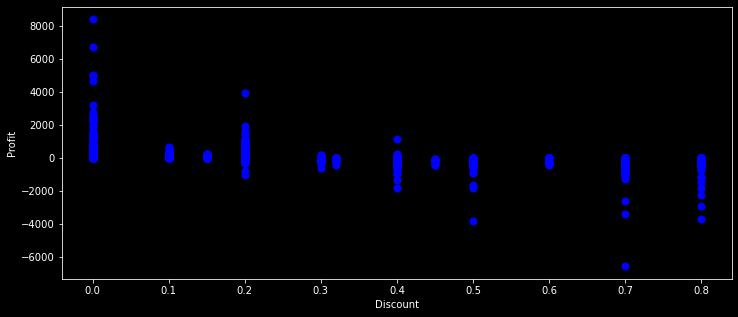

In [12]:
#creating a scatter plot
d.plot.scatter(x='Discount',y='Profit',c='blue',s=50,figsize=(12,5))
plt.show()

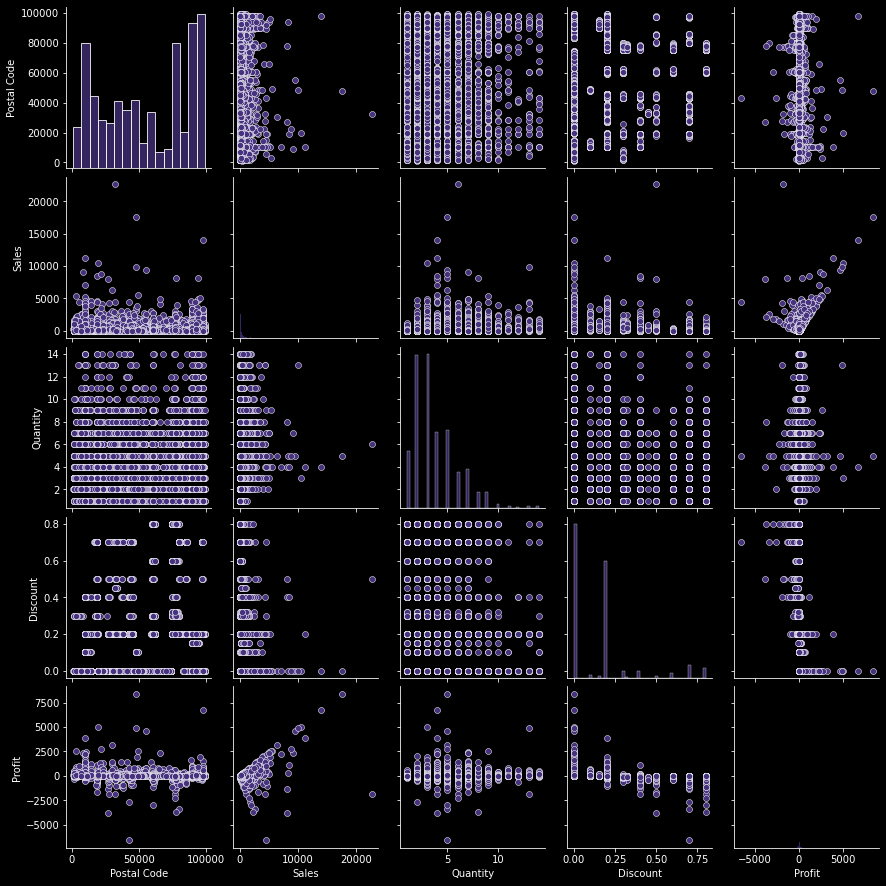

In [16]:
#All data in one code
sns.set_palette('viridis')
sns.pairplot(d)
plt.show()

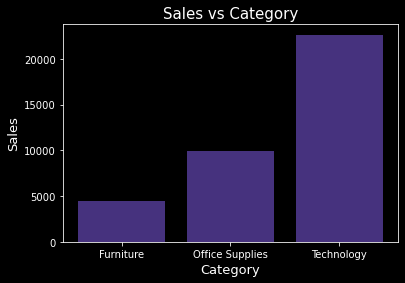

In [15]:
#Category vs Sales Bar Graph
plt.bar('Category','Sales',data=d)
plt.title('Sales vs Category',size= 15)
plt.xlabel('Category',size= 13)
plt.ylabel('Sales',size= 13)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


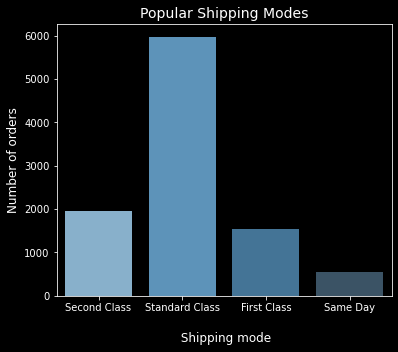

In [18]:
#Shipping Models
plt.figure(figsize=(6,5))
sns.countplot('Ship Mode',data=d, palette='Blues_d')
plt.title('Popular Shipping Modes',size=14)
plt.xlabel('\n Shipping mode',size=12)
plt.ylabel('Number of orders',size=12)
plt.xticks(fontsize=10)
plt.show()

       Segment  Quantity
0     Consumer     19521
1    Corporate     11608
2  Home Office      6744


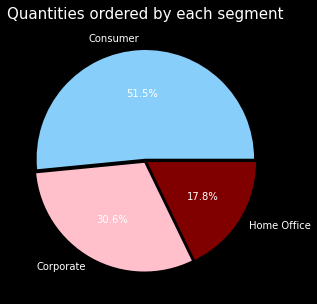

In [19]:
#Quantities Ordered by each Segment
df_group = d.groupby('Segment')['Quantity'].sum().reset_index()
print(df_group)
labels = d['Segment'].unique()
colors = ['lightskyblue', 'pink', 'maroon']
plt.figure(figsize=(5,5))
plt.pie(df_group['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02), colors=colors)
plt.title('Quantities ordered by each segment',size= 15)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


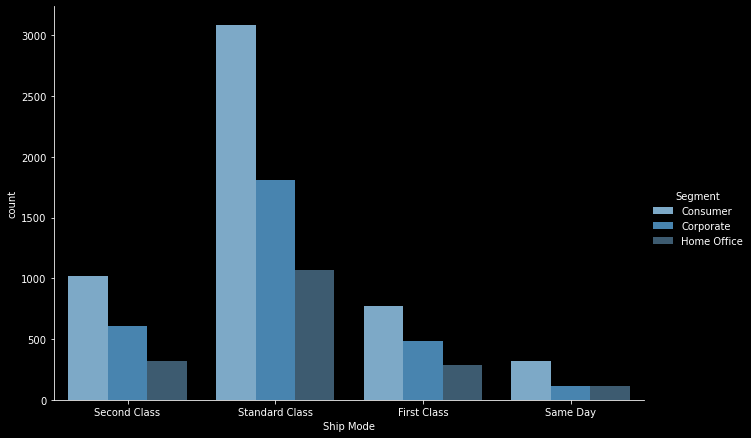

In [26]:
#Shipping Mode vs Count
sns.catplot('Ship Mode',data=d,hue='Segment',kind='count',palette='Blues_d',aspect=1.5,height=6)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


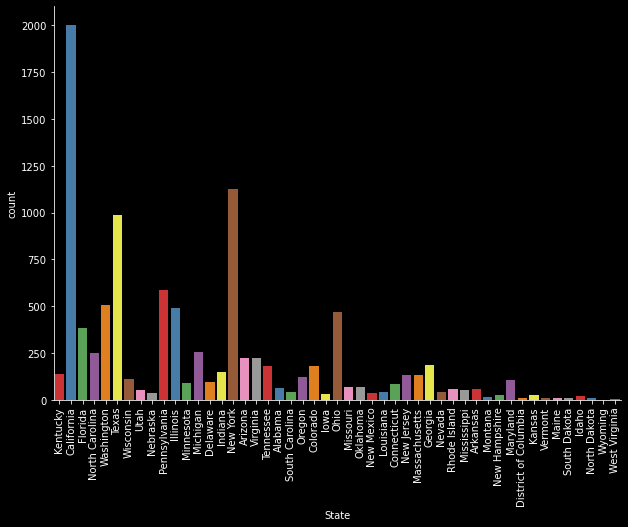

In [25]:
#Cities each of Least and Most Quantities Ordered
sns.catplot('State',kind='count',data=d,palette='Set1',height=6,aspect=1.5)
plt.xticks(rotation=90)
plt.show()

    Region  Quantity
0  Central      8780
1     East     10618
2    South      6209
3     West     12266


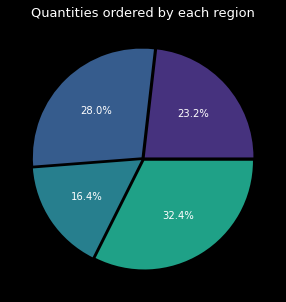

In [27]:
#Quantities Ordered Region Wise
df_region=d.groupby('Region')['Quantity'].sum().reset_index()
print(df_region)
labels = df_region['Region'].unique()
plt.figure(figsize=(5,5))
plt.pie(df_region['Quantity'],autopct='%1.1f%%',explode=(0.02,0.02,0.02,0.02),)
plt.title('Quantities ordered by each region',size=13)
plt.show()

In [28]:
#Highest Selling Categories
df_cats = d.groupby('Category')['Quantity'].sum().reset_index()
df_cats

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


In [29]:
#Most Profitable Products
dftop10_items = d.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
dftop10_items.reset_index(drop=True,inplace=True)
dftop10_items=dftop10_items.head(10)
dftop10_items

,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


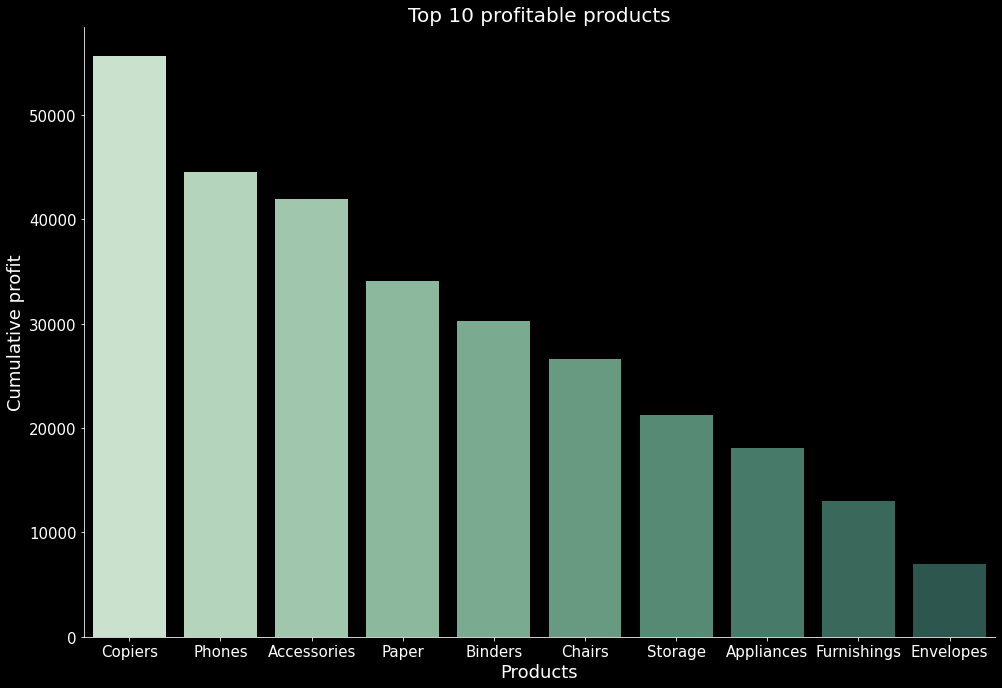

In [30]:
#Visualizing the Top 10 Profitable Products
sns.catplot('Sub-Category','Profit',data=dftop10_items,kind='bar',aspect=1.5,height=9,palette='ch:2.5,-.2,dark=.3')
plt.title('Top 10 profitable products',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('Products',size=18)
plt.show()

In [31]:
#Top Profitable cities
dftop10_cities = d.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
dftop10_cities = dftop10_cities.head(10)
dftop10_cities

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


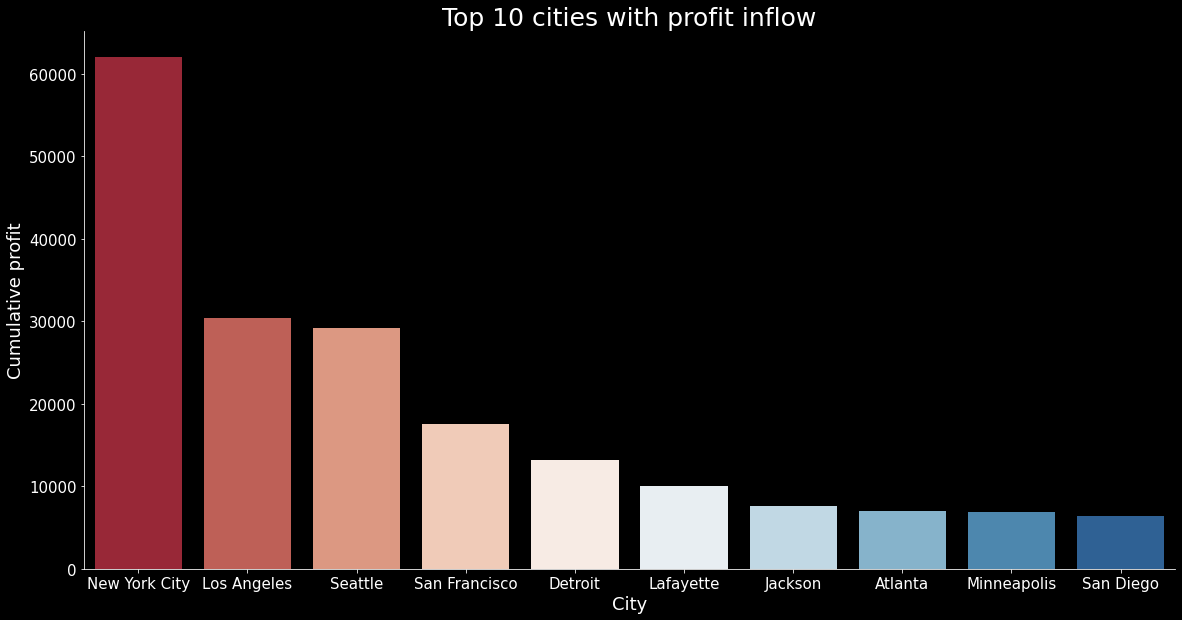

In [32]:
#TOP 10 PROFITABLE CITIES
sns.catplot('City','Profit',data=dftop10_cities,kind='bar',aspect=2,height=8,palette='RdBu')
plt.title('Top 10 cities with profit inflow',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('City',size=18)
plt.show()

## Conclusion

### From above Data Visualization we can conclude as follow

###### Data Quality: The quality of data seems to be good and does not need data preprocessing also there are no null values in the DataSet

### 'Standard Class' accounts for the majority of profit.
### 'HomeOffice' segment generates least sale.